## 1. Download COCO 2017 Annotations data set

In [138]:
import os
print(f"os.getcwd()={os.getcwd()}")

# download annotation from https://cocodataset.org/#download: 2017 Train/Val annotations [241MB]
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip 'annotations_trainval2017.zip'
!ls -la /content/annotations

os.getcwd()=/content
--2021-07-24 00:03:04--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.147.11
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.147.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip.2’

annotations_trainva 100%[===================>] 241.19M  41.0MB/s    in 5.4s    

2021-07-24 00:03:10 (45.0 MB/s) - ‘annotations_trainval2017.zip.2’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
replace annotations/instances_train2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: ann

## 2. Some stats about COCO 2017 Annotations data set

In [139]:
import json

# -rw-rw-r-- 1 root root 469785474 Sep  1  2017 instances_train2017.json
with open('/content/annotations/instances_train2017.json', "r") as train2017_file:
  train_2017_data:dict = json.load(train2017_file)

print(f"train_2017_data.keys()={train_2017_data.keys()}")
print(f"number of images={len(train_2017_data['images'])}")
print(f"number of annotations/bounding boxes={len(train_2017_data['annotations'])}")
print(f"number of categories={len(train_2017_data['categories'])}")
print(f"example annotation/bounding box=\n{train_2017_data['annotations'][0]}")
print(f"example category=\n{train_2017_data['categories'][0:10]}")
print(f"example image=\n{train_2017_data['images'][0]}")

images:list = train_2017_data["images"]
categories:list = train_2017_data["categories"]
annotations:list = train_2017_data["annotations"]

train_2017_data.keys()=dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
number of images=118287
number of annotations/bounding boxes=860001
number of categories=80
example annotation/bounding box=
{'segmentation': [[239.97, 260.24, 222.04, 270.49, 199.84, 253.41, 213.5, 227.79, 259.62, 200.46, 274.13, 202.17, 277.55, 210.71, 249.37, 253.41, 237.41, 264.51, 242.54, 261.95, 228.87, 271.34]], 'area': 2765.1486500000005, 'iscrowd': 0, 'image_id': 558840, 'bbox': [199.84, 200.46, 77.71, 70.88], 'category_id': 58, 'id': 156}
example category=
[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8

## 3. readme data for class distribution (along with the class names) along with a graph 

### 3.1 Class IDs to Class Names

In [140]:
# print the category details
tab="\t"
cat_id_to_cat_name:dict = {}
for category in categories:
    print(f"id={category['id']}{tab}name={category['name']}{tab}{tab}supercategory={category['supercategory']}")
    cat_id_to_cat_name[category['id']] = category['name']

id=1	name=person		supercategory=person
id=2	name=bicycle		supercategory=vehicle
id=3	name=car		supercategory=vehicle
id=4	name=motorcycle		supercategory=vehicle
id=5	name=airplane		supercategory=vehicle
id=6	name=bus		supercategory=vehicle
id=7	name=train		supercategory=vehicle
id=8	name=truck		supercategory=vehicle
id=9	name=boat		supercategory=vehicle
id=10	name=traffic light		supercategory=outdoor
id=11	name=fire hydrant		supercategory=outdoor
id=13	name=stop sign		supercategory=outdoor
id=14	name=parking meter		supercategory=outdoor
id=15	name=bench		supercategory=outdoor
id=16	name=bird		supercategory=animal
id=17	name=cat		supercategory=animal
id=18	name=dog		supercategory=animal
id=19	name=horse		supercategory=animal
id=20	name=sheep		supercategory=animal
id=21	name=cow		supercategory=animal
id=22	name=elephant		supercategory=animal
id=23	name=bear		supercategory=animal
id=24	name=zebra		supercategory=animal
id=25	name=giraffe		supercategory=animal
id=27	name=backpack		supercate

### 3.2 Number of bounding boxes for each class



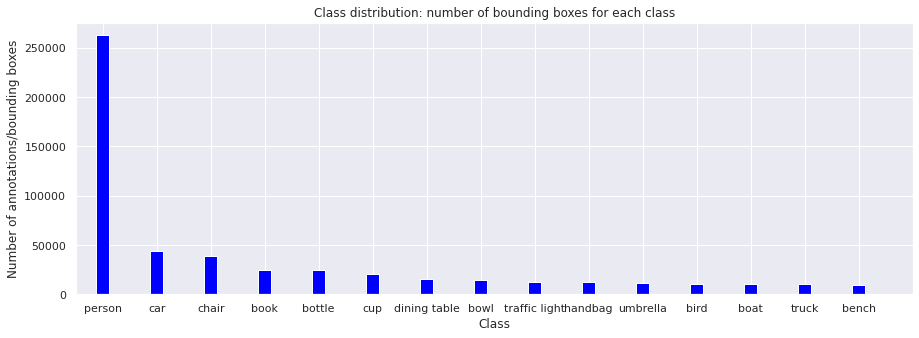

In [141]:
cat_name_to_annot_count:dict = {}
for annot in annotations:
    cat_name = cat_id_to_cat_name[annot['category_id']]
    if not cat_name_to_annot_count.get(cat_name): cat_name_to_annot_count[cat_name] = 0  # initialize with 0 for the very first time.
    cat_name_to_annot_count[cat_name] += 1

# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
sorted_cats = [ k for k, v in sorted(cat_name_to_annot_count.items(), reverse=True, key=lambda item: item[1]) ]
sorted_cat_counts = [ v for k, v in sorted(cat_name_to_annot_count.items(), reverse=True, key=lambda item: item[1]) ]  # sort in descending order

from matplotlib import pyplot as plt
import numpy as np

top_n = 15
plt.figure(figsize=(top_n,5))   # figsize : (float, float), optional, default: None; width, height in inches. If not provided, defaults to figure.figsize = [6.4, 4.8].
plt.bar(np.arange(top_n),sorted_cat_counts[:top_n], width=0.25, tick_label=sorted_cats[:top_n], color='blue')   
#plt.xticks(rotation=90) 
plt.xlim(-0.5,top_n)
plt.xlabel('Class')
plt.ylabel('Number of annotations/bounding boxes')
plt.title('Class distribution: number of bounding boxes for each class')
plt.show()

## 4. KMeans Clustering

## 4.1 Setup data for normalized (box_width, box_height) for KMeans Clustering

In [142]:
import numpy as np
import pandas as pd

images_df = pd.DataFrame(images, columns = ['id', 'file_name', 'width', 'height'])
print(images_df.head())
annotations_df = pd.DataFrame(annotations, columns = ['id', 'bbox'])
print(annotations_df.head())

annotation_map_df = pd.concat([images_df, annotations_df], 1)[['file_name', 'width', 'height', 'bbox']]
print(annotation_map_df.head())

box_df =pd.DataFrame(annotation_map_df['bbox'].values.tolist(), columns =['x', 'y', 'box_width', 'box_height'])
annotation_map_df = pd.concat([annotation_map_df, box_df], 1)
annotation_map_df = annotation_map_df.drop('bbox', axis =1)

print(annotation_map_df.head())

#Normalize the Box Dimensions based on Image Height and Width
annotation_map_df['x'] = annotation_map_df['x'] / annotation_map_df['width']
annotation_map_df['y'] = annotation_map_df['y'] / annotation_map_df['height']
annotation_map_df['box_width'] = annotation_map_df['box_width'] / annotation_map_df['width']
annotation_map_df['box_height'] = annotation_map_df['box_height'] / annotation_map_df['height']

print(annotation_map_df.head())

annotation_map_df = annotation_map_df.dropna()
annotation_map_df.isnull().any()

bb_width_height_arr = annotation_map_df[["box_width", "box_height"]].to_numpy()
bb_width_height_arr.shape

       id         file_name  width  height
0  391895  000000391895.jpg    640     360
1  522418  000000522418.jpg    640     480
2  184613  000000184613.jpg    500     336
3  318219  000000318219.jpg    556     640
4  554625  000000554625.jpg    426     640
     id                             bbox
0   156   [199.84, 200.46, 77.71, 70.88]
1   509  [234.22, 317.11, 149.39, 38.55]
2   603   [239.48, 347.87, 160.0, 57.81]
3   918      [296.65, 388.33, 1.03, 0.0]
4  1072  [251.87, 333.42, 125.94, 22.71]
          file_name  width  height                             bbox
0  000000391895.jpg  640.0   360.0   [199.84, 200.46, 77.71, 70.88]
1  000000522418.jpg  640.0   480.0  [234.22, 317.11, 149.39, 38.55]
2  000000184613.jpg  500.0   336.0   [239.48, 347.87, 160.0, 57.81]
3  000000318219.jpg  556.0   640.0      [296.65, 388.33, 1.03, 0.0]
4  000000554625.jpg  426.0   640.0  [251.87, 333.42, 125.94, 22.71]
          file_name  width  height       x       y  box_width  box_height
0  00000039189

(118287, 2)

### 4.2 Bounding box width, height scatter plot

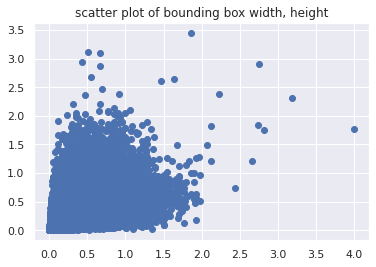

In [143]:
plt.scatter(bb_width_height_arr[:,0], bb_width_height_arr[:,1])
plt.title("scatter plot of bounding box width, height")
plt.show()


### 4.3 Perform KMeans clustering on the bounding box (width, height) and store results

In [144]:
from sklearn.cluster import KMeans
from dataclasses import dataclass
from typing import List
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

def compute_IOU(x,centroids):
    '''
    x == a bounding box's (width, height)

    centroids == the anchor boxes computed by kmeans; number of boxes == number of cluster fed to kmeans

    returns a set of IoU values: one ​​for this single bounding box with each anchor box
    '''
    IoUs = []
    
    for centroid in centroids:
            bb_w, bb_h = x # bounding box's w, h
            c_w,c_h = centroid # anchor box w, h
            # print(c_w,c_h)
            if c_w>=bb_w and c_h>=bb_h: #anchor box surrounded by bounding box
              iou = bb_w*bb_h/(c_w*c_h)
            elif c_w>=bb_w and c_h<=bb_h: #anchor
              iou = bb_w*c_h/(bb_w*bb_h + (c_w-bb_w)*c_h)
            elif c_w<=bb_w and c_h>=bb_h: #anchor box is taller than bounding box in the width 
              iou = c_w*bb_h/(bb_w*bb_h + c_w*(c_h-bb_h))
            else: #bounding box surrounded by anchor means both w,h are bigger than c_w and c_h respectively
              iou = (c_w*c_h)/(bb_w*bb_h)
            IoUs.append(iou) 
    return np.array(IoUs)  # return the IOU between this bounding box and each of the anchor boxes/centroids

def compute_avg_IOU(X, centroids):
    '''
    X == the set of bounding boxes: list of (width, height)

    centroids == the anchor boxes computed by kmeans; number of boxes == number of cluster fed to kmeans
    '''
    n,d = X.shape
    sum_of_maxIOU = 0.
    for i in range(X.shape[0]):   # iterate throught each bounding  box..
        sum_of_maxIOU+= max(compute_IOU(X[i],centroids)) #compute the IOU for each anchor box; take the max; add it to the maxIOU
    return sum_of_maxIOU / X.shape[0]   # compute the average: sum / number of bounding boxes

def plot_anchor_boxes(num_of_clusters, centroids):
    
    xdata = np.array([0.5]*len(centroids))
    ydata = np.array([0.5]*len(centroids))

    xerror = np.array([list(np.exp(centroids[:, 0])/2)]*2)
    yerror = np.array([list(np.exp(centroids[:, 1])/2)]*2)

    errorboxes = []

    for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T):
        rect = Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
        errorboxes.append(rect)

    pc = PatchCollection(errorboxes, facecolor='None', alpha=1, edgecolor='b')
    fig, ax = plt.subplots(1)

    ax.add_collection(pc)
    plt.title(f'Anchor Boxes for number of clusters = {num_of_clusters}')
    artists = plt.errorbar(xdata, ydata, xerr=xerror, yerr=yerror, fmt='None', ecolor='None')

@dataclass
class KMeansResult:
    num_of_clusters:int
    cluster_centers:List[List[float]]
    pred_y:List[int]
    avg_IOU:float

kMeansResults:list = [None,None,None]
# n_init : int, default=10;    Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
# max_iter : int, default=300; Maximum number of iterations of the k-means algorithm for a single run.
# random_state : int, RandomState instance, default=None; Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.
num_cluster_range = range(3,7)   # compute kmeans cluster for number of clusters = 3 to 6
for i in num_cluster_range:
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
  # Index of the cluster each sample belongs to.
  pred_y = kmeans.fit_predict(bb_width_height_arr)
  avg_iou = compute_avg_IOU(bb_width_height_arr, kmeans.cluster_centers_)
  kMeansResults.append(KMeansResult(i, kmeans.cluster_centers_,pred_y, avg_iou))
  #print(kmeans.cluster_centers_,pred_y)

print(kMeansResults)



[None, None, None, KMeansResult(num_of_clusters=3, cluster_centers=array([[0.29170448, 0.41593413],
       [0.07272931, 0.09557326],
       [0.73640768, 0.79335423]]), pred_y=array([1, 1, 0, ..., 1, 1, 1], dtype=int32), avg_IOU=0.3896668733873761), KMeansResult(num_of_clusters=4, cluster_centers=array([[0.06698513, 0.08807545],
       [0.88730536, 0.55921447],
       [0.25906547, 0.36027513],
       [0.45153117, 0.92247932]]), pred_y=array([0, 0, 2, ..., 0, 0, 0], dtype=int32), avg_IOU=0.40954508366064235), KMeansResult(num_of_clusters=5, cluster_centers=array([[0.213444  , 0.2620148 ],
       [0.86614312, 0.49339784],
       [0.05647555, 0.07617373],
       [0.31349763, 0.60741733],
       [0.63141078, 1.07827102]]), pred_y=array([0, 2, 0, ..., 2, 2, 2], dtype=int32), avg_IOU=0.44314776940260264), KMeansResult(num_of_clusters=6, cluster_centers=array([[0.05418414, 0.07093342],
       [0.2636181 , 0.6031903 ],
       [0.17661715, 0.24701394],
       [0.56188941, 1.05368201],
       [1.

### 4.4 plot of Number of Clusters vs Average of Max IOU

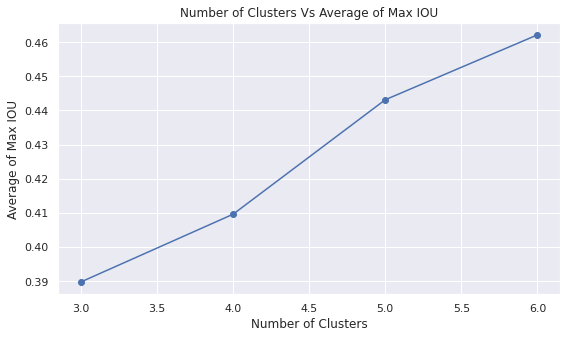

In [145]:
fig = plt.figure(figsize=(9, 5))
plt.plot(num_cluster_range, [kMeansResult.avg_IOU for kMeansResult in kMeansResults[3:] ], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average of Max IOU')
plt.title("Number of Clusters Vs Average of Max IOU")
plt.show()


### 4.5 Anchor boxes for num of clusters = 3

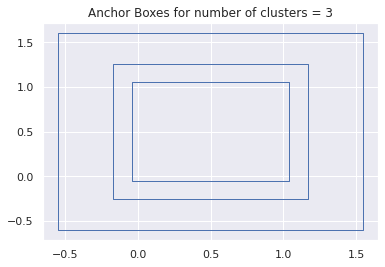

In [146]:
plot_anchor_boxes(kMeansResults[3].num_of_clusters, kMeansResults[3].cluster_centers)


### 4.5 Anchor boxes for num of clusters = 4

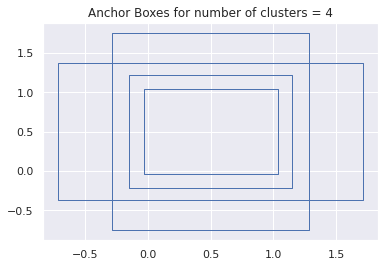

In [147]:
plot_anchor_boxes(kMeansResults[4].num_of_clusters, kMeansResults[4].cluster_centers)

### 4.5 Anchor boxes for num of clusters = 5

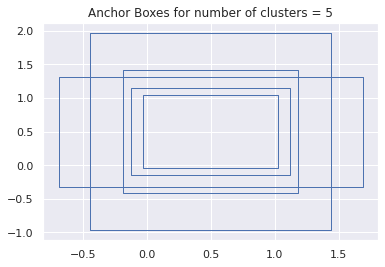

In [148]:
plot_anchor_boxes(kMeansResults[5].num_of_clusters, kMeansResults[5].cluster_centers)

### 4.5 Anchor boxes for num of clusters = 6

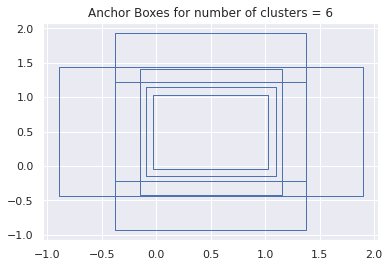

In [149]:
plot_anchor_boxes(kMeansResults[6].num_of_clusters, kMeansResults[6].cluster_centers)